# Water Potability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import seaborn as sns

plt.rcParams['figure.figsize'] = (10.0, 8) # set default size of plots
pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
# How much memory the dataset takes?
# Are there some missing values?

df.info(memory_usage='deep') # memory_usage parameter allows us to see the real memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df[(df['potability'] == 1) & ((df['ph'] > 10) | (df['ph'] < 4))].count()

ph                 48
hardness           48
solids             48
chloramines        48
sulfate            37
conductivity       48
organic_carbon     48
trihalomethanes    44
turbidity          48
potability         48
dtype: int64

In [6]:
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [7]:
df.describe()

ph     hardness        solids  chloramines      sulfate   
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000  \
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       conductivity  organic_carbon  trihalomethanes    turbidity   potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

<AxesSubplot: >

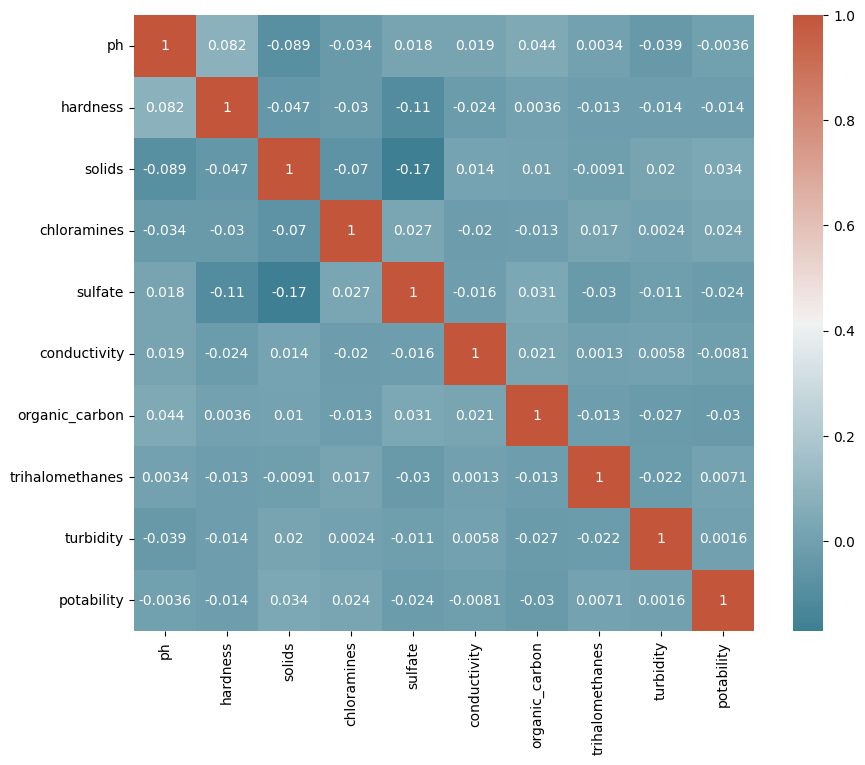

In [8]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

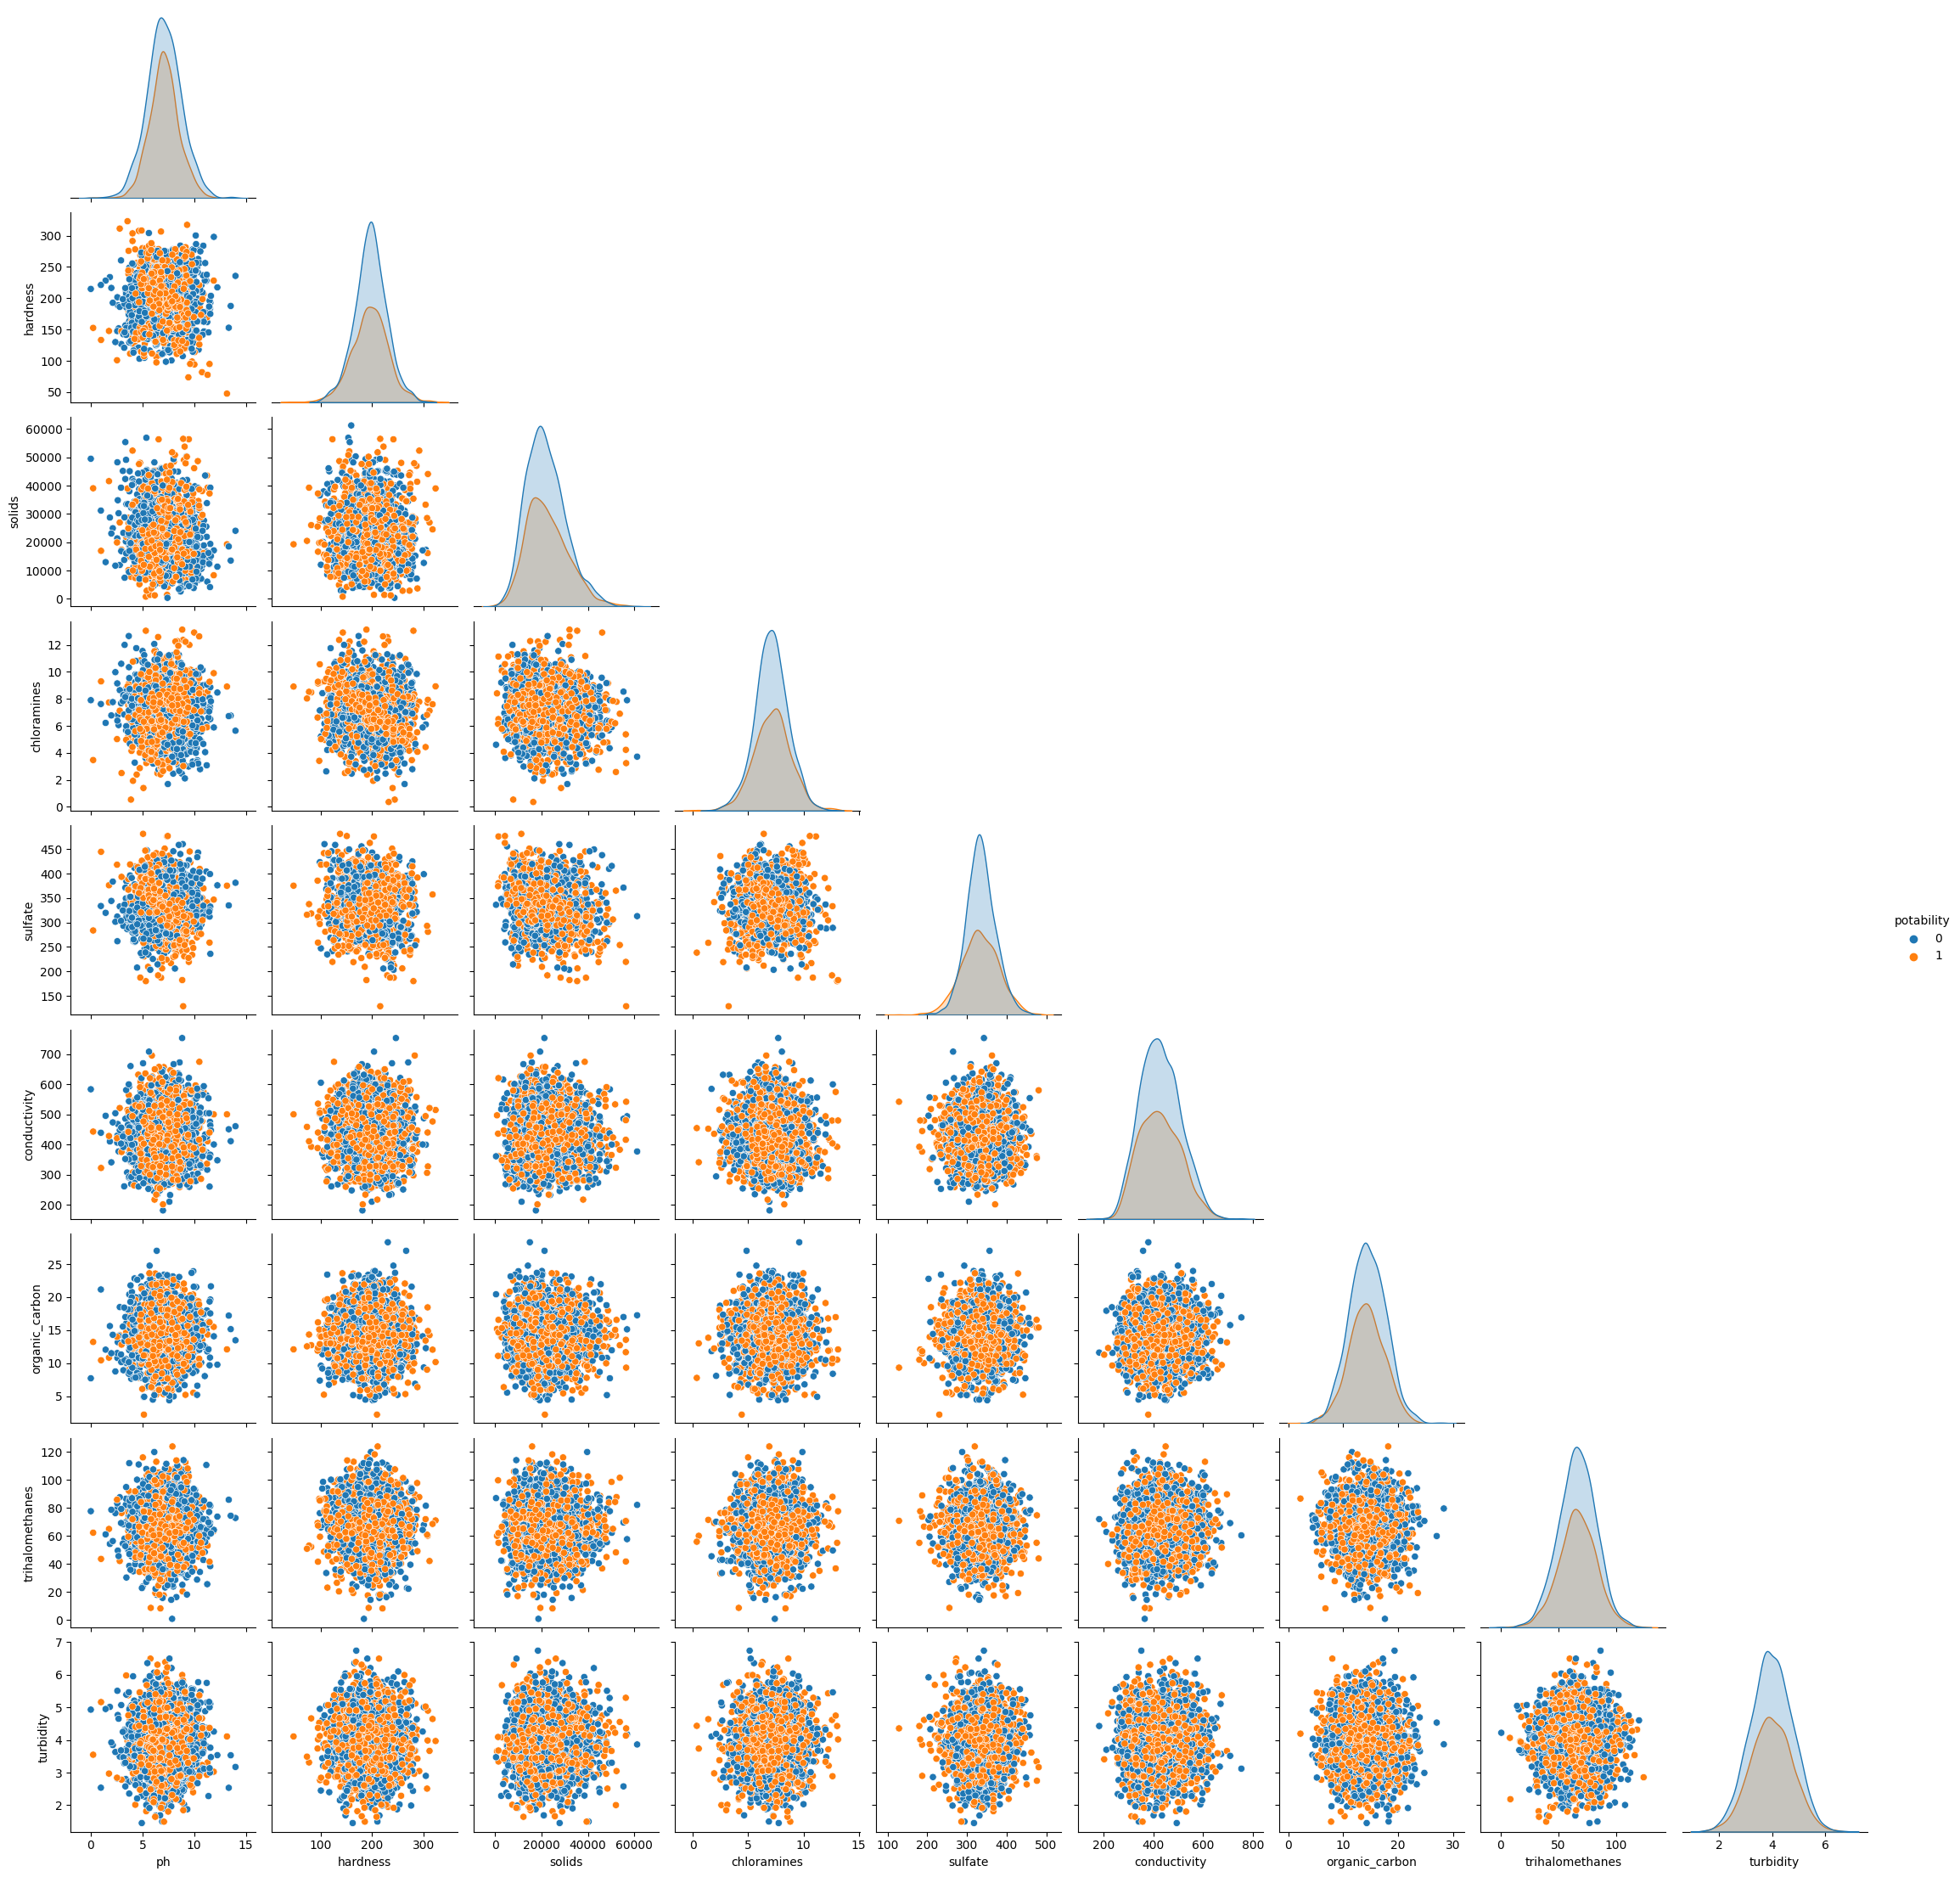

In [9]:
sns.pairplot(df, corner=True, hue='potability')

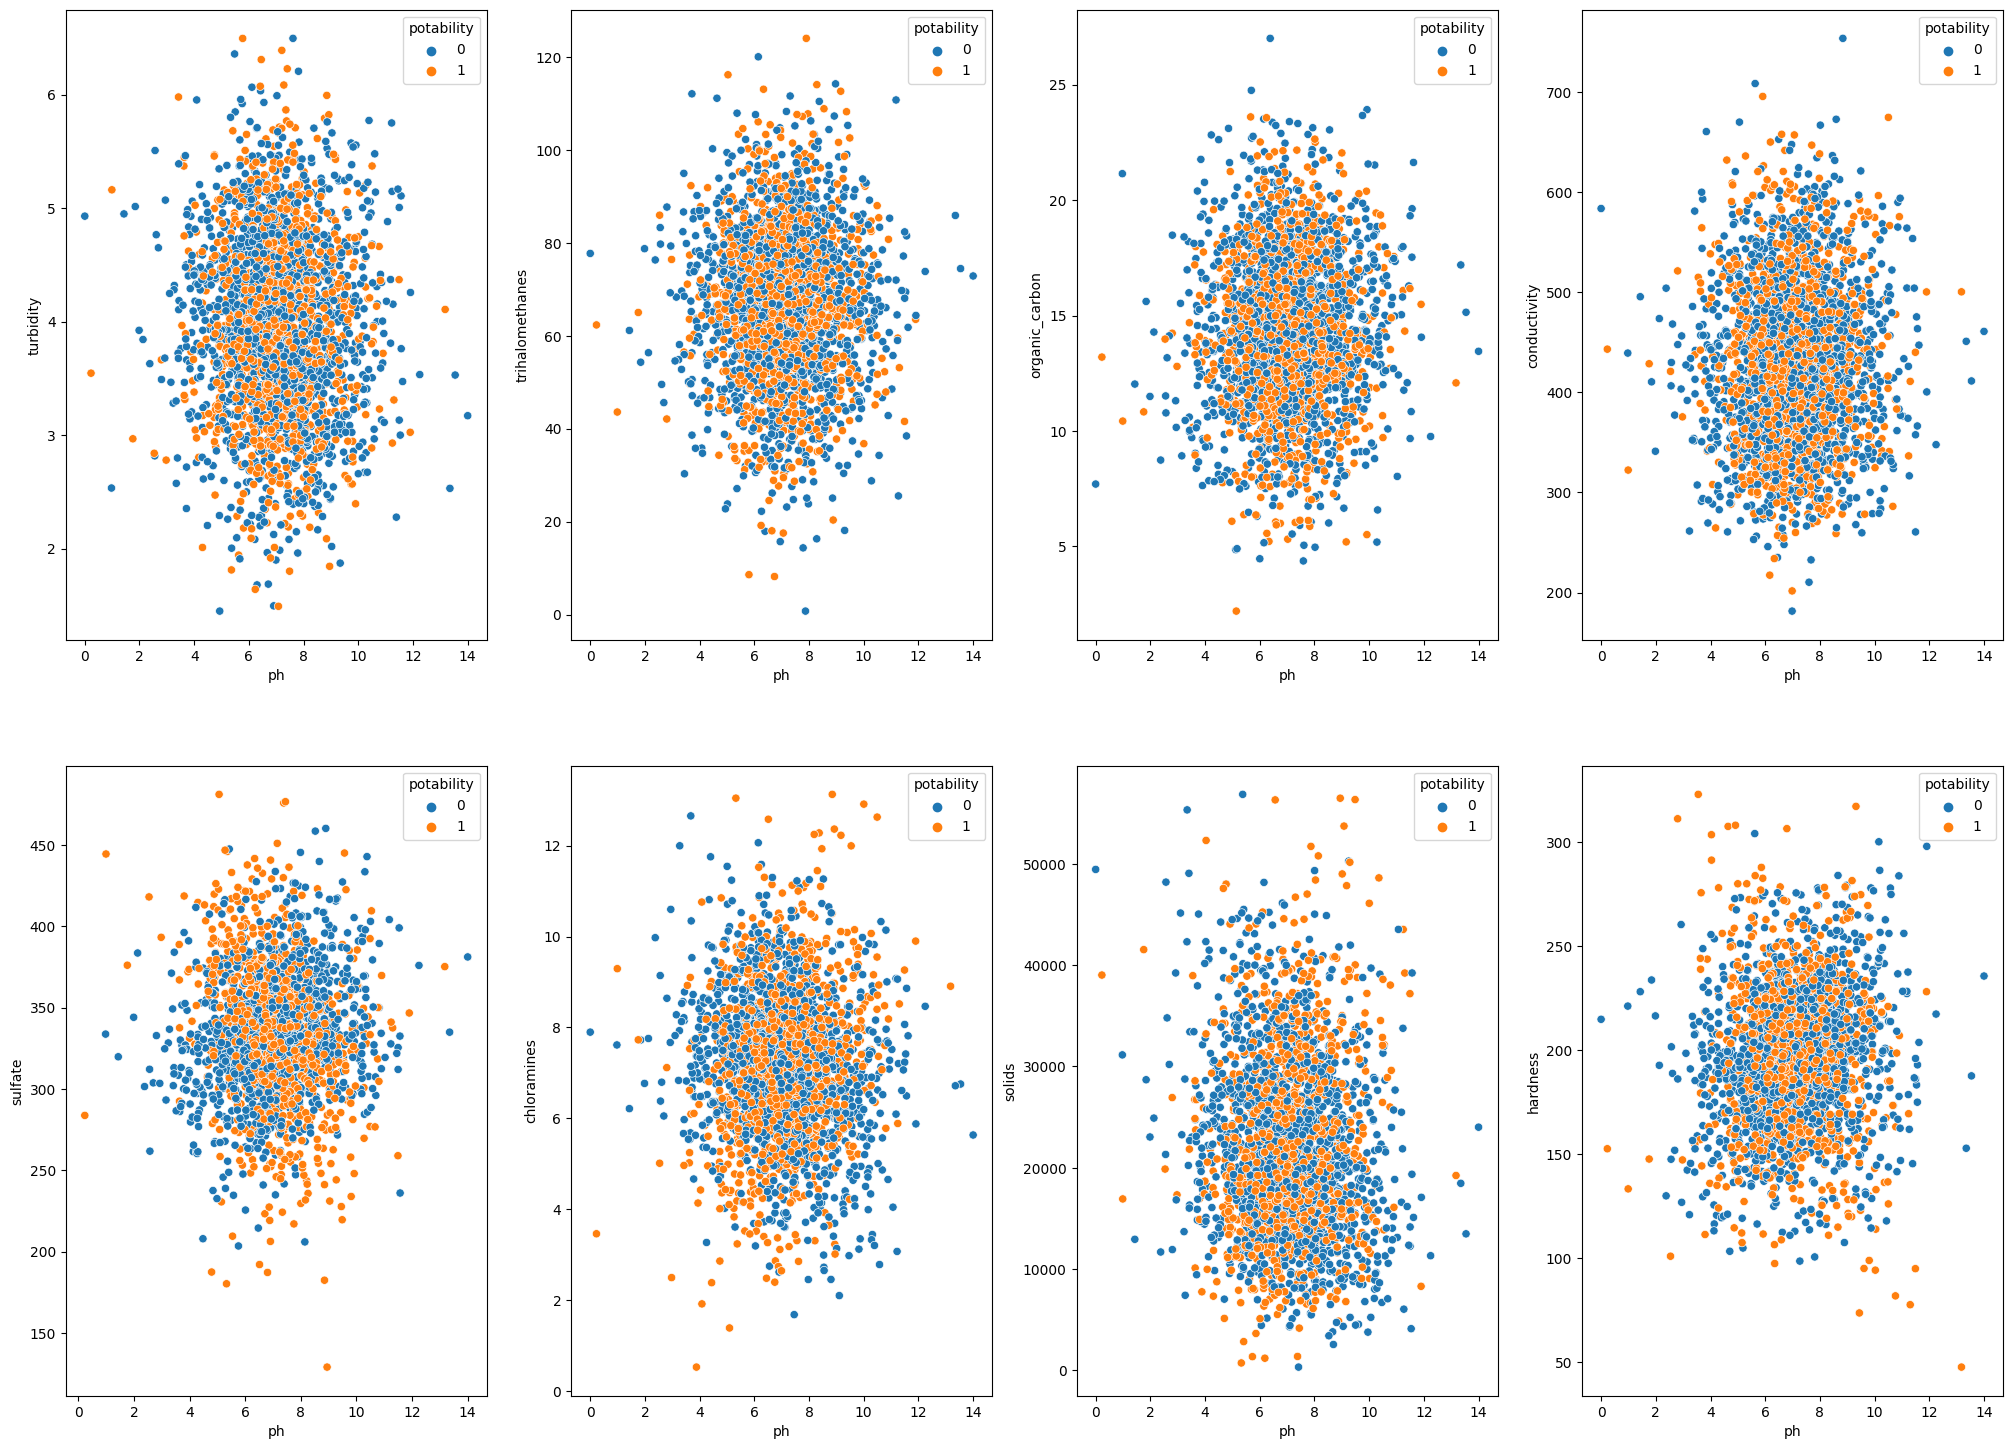

In [40]:
plt.rcParams['figure.figsize'] = (25.0, 18)

fig, axs = plt.subplots(ncols=4, nrows=2, sharey=False)
sns.scatterplot(x='ph', y='turbidity',       data=df, ax=axs[0][0], hue='potability')
sns.scatterplot(x='ph', y='trihalomethanes', data=df, ax=axs[0][1], hue='potability')
sns.scatterplot(x='ph', y='organic_carbon',  data=df, ax=axs[0][2], hue='potability')
sns.scatterplot(x='ph', y='conductivity',    data=df, ax=axs[0][3], hue='potability')
sns.scatterplot(x='ph', y='sulfate',         data=df, ax=axs[1][0], hue='potability')
sns.scatterplot(x='ph', y='chloramines',     data=df, ax=axs[1][1], hue='potability')
sns.scatterplot(x='ph', y='solids',          data=df, ax=axs[1][2], hue='potability')
sns.scatterplot(x='ph', y='hardness',        data=df, ax=axs[1][3], hue='potability')


plt.show()

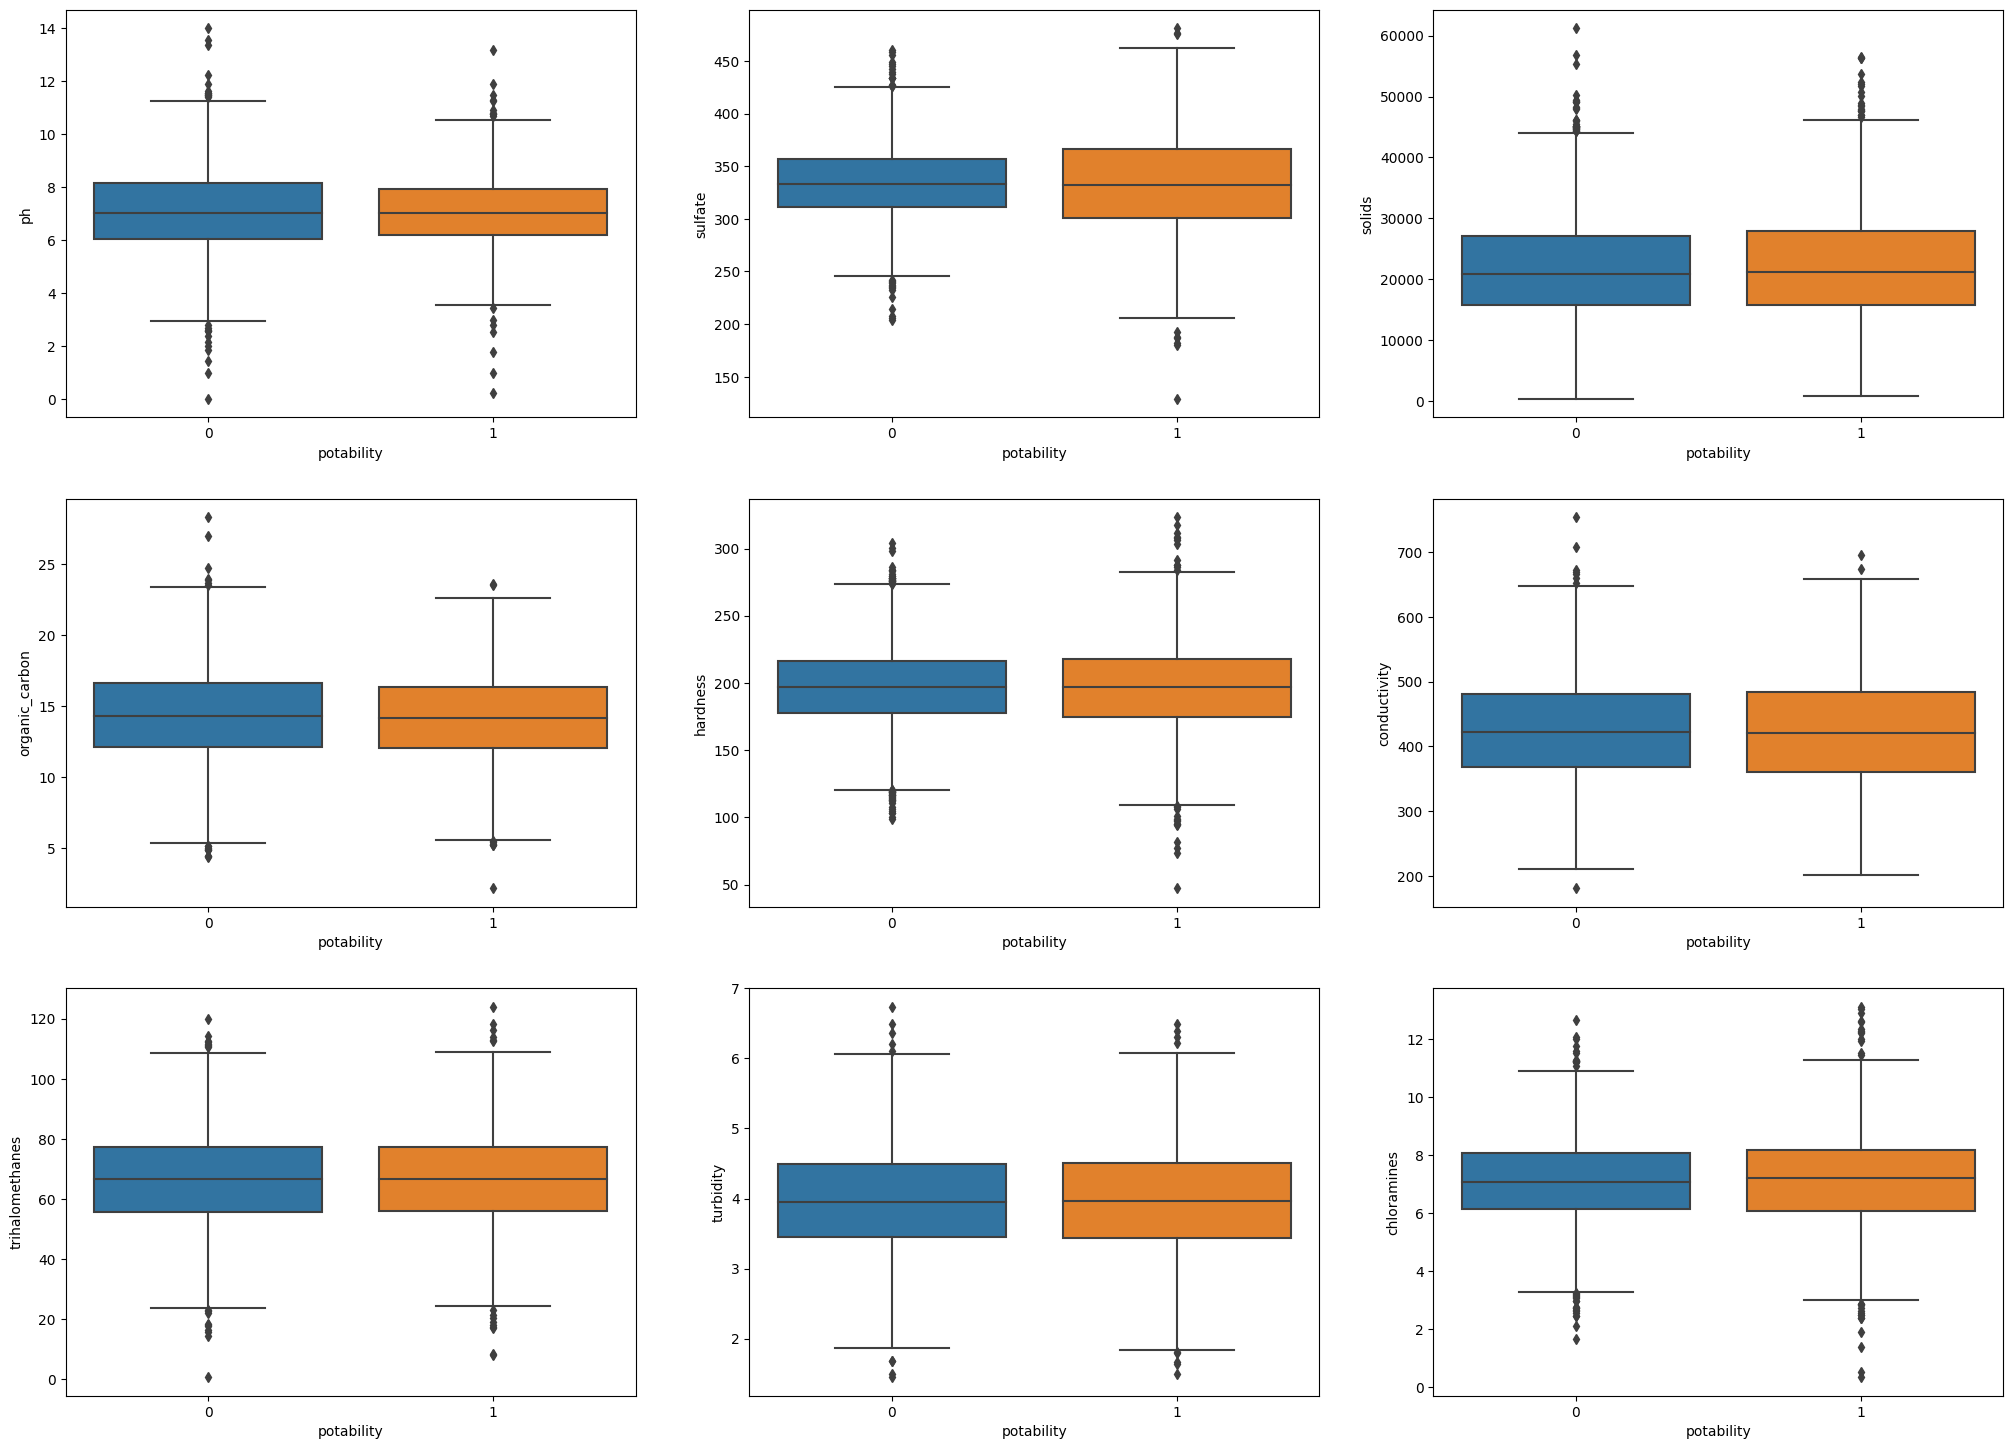

In [10]:
plt.rcParams['figure.figsize'] = (25.0, 18)

fig, axs = plt.subplots(ncols=3, nrows=3, sharey=False)
sns.boxplot(x=df['potability'], y=df['ph'], ax=axs[0][0])
sns.boxplot(x=df['potability'], y=df['sulfate'], ax=axs[0][1])
sns.boxplot(x=df['potability'], y=df['solids'], ax=axs[0][2])
sns.boxplot(x=df['potability'], y=df['organic_carbon'], ax=axs[1][0])
sns.boxplot(x=df['potability'], y=df['hardness'], ax=axs[1][1])
sns.boxplot(x=df['potability'], y=df['conductivity'], ax=axs[1][2])
sns.boxplot(x=df['potability'], y=df['trihalomethanes'], ax=axs[2][0])
sns.boxplot(x=df['potability'], y=df['turbidity'], ax=axs[2][1])
sns.boxplot(x=df['potability'], y=df['chloramines'], ax=axs[2][2])


plt.show()

## Feature pre-processing

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [52]:
df = pd.read_csv("water_potability.csv", sep=',')
df.columns = [col.lower() for col in df]

features = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity']
target = 'potability'
df.head()

ph    hardness        solids  chloramines     sulfate  conductivity   
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654  \
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

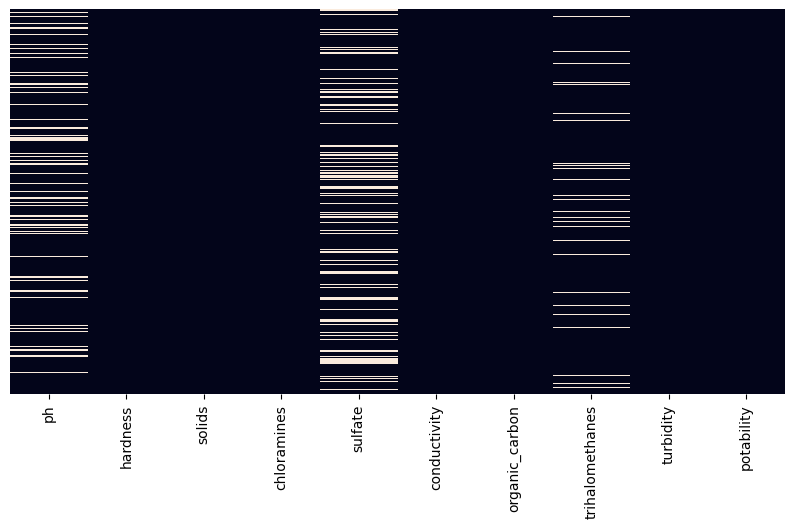

In [53]:
plt.rcParams['figure.figsize'] = (10.0, 5)

# Creazione del grafico dei valori mancanti utilizzando Seaborn
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.show()

Gestisco i valori nulli effettuando una media pesata dei valori 0 e 1 della colonna target (potability)

In [54]:
def fillNall(df, features):
    
    for feature in features:
        
        condition = df['potability'] == 0

        map = {

            True: df.loc[df['potability']==0][feature].median(),
            False:df.loc[df['potability']==1][feature].median()
        }

        df[feature].fillna(condition.map(map), inplace=True)

    return df

In [55]:
# Creazione del ColumnTransformer con lo StandardScaler
scaler_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features),
    ]
)

preprocessing_pipeline = Pipeline([
    ('fill_nan', FunctionTransformer(fillNall, kw_args={'features': ['ph', 'sulfate', 'trihalomethanes']})),
    ('scaler', scaler_transformer),
])



# Applicazione della pipeline al DataFrame
X = preprocessing_pipeline.fit_transform(df.copy(deep=True))
y = df['potability'].copy(deep=True)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
X_train = np.concatenate((X_train, X_train), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

## Models

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, precision_score

### Baseline models

Base-baseline model

In [83]:
baseline_accuracy = df[df['potability'] == 0]['potability'].count() / df['potability'].count()
print("Baseline model accuracy:", baseline_accuracy)

Baseline model accuracy: 0.6098901098901099


Cross validation

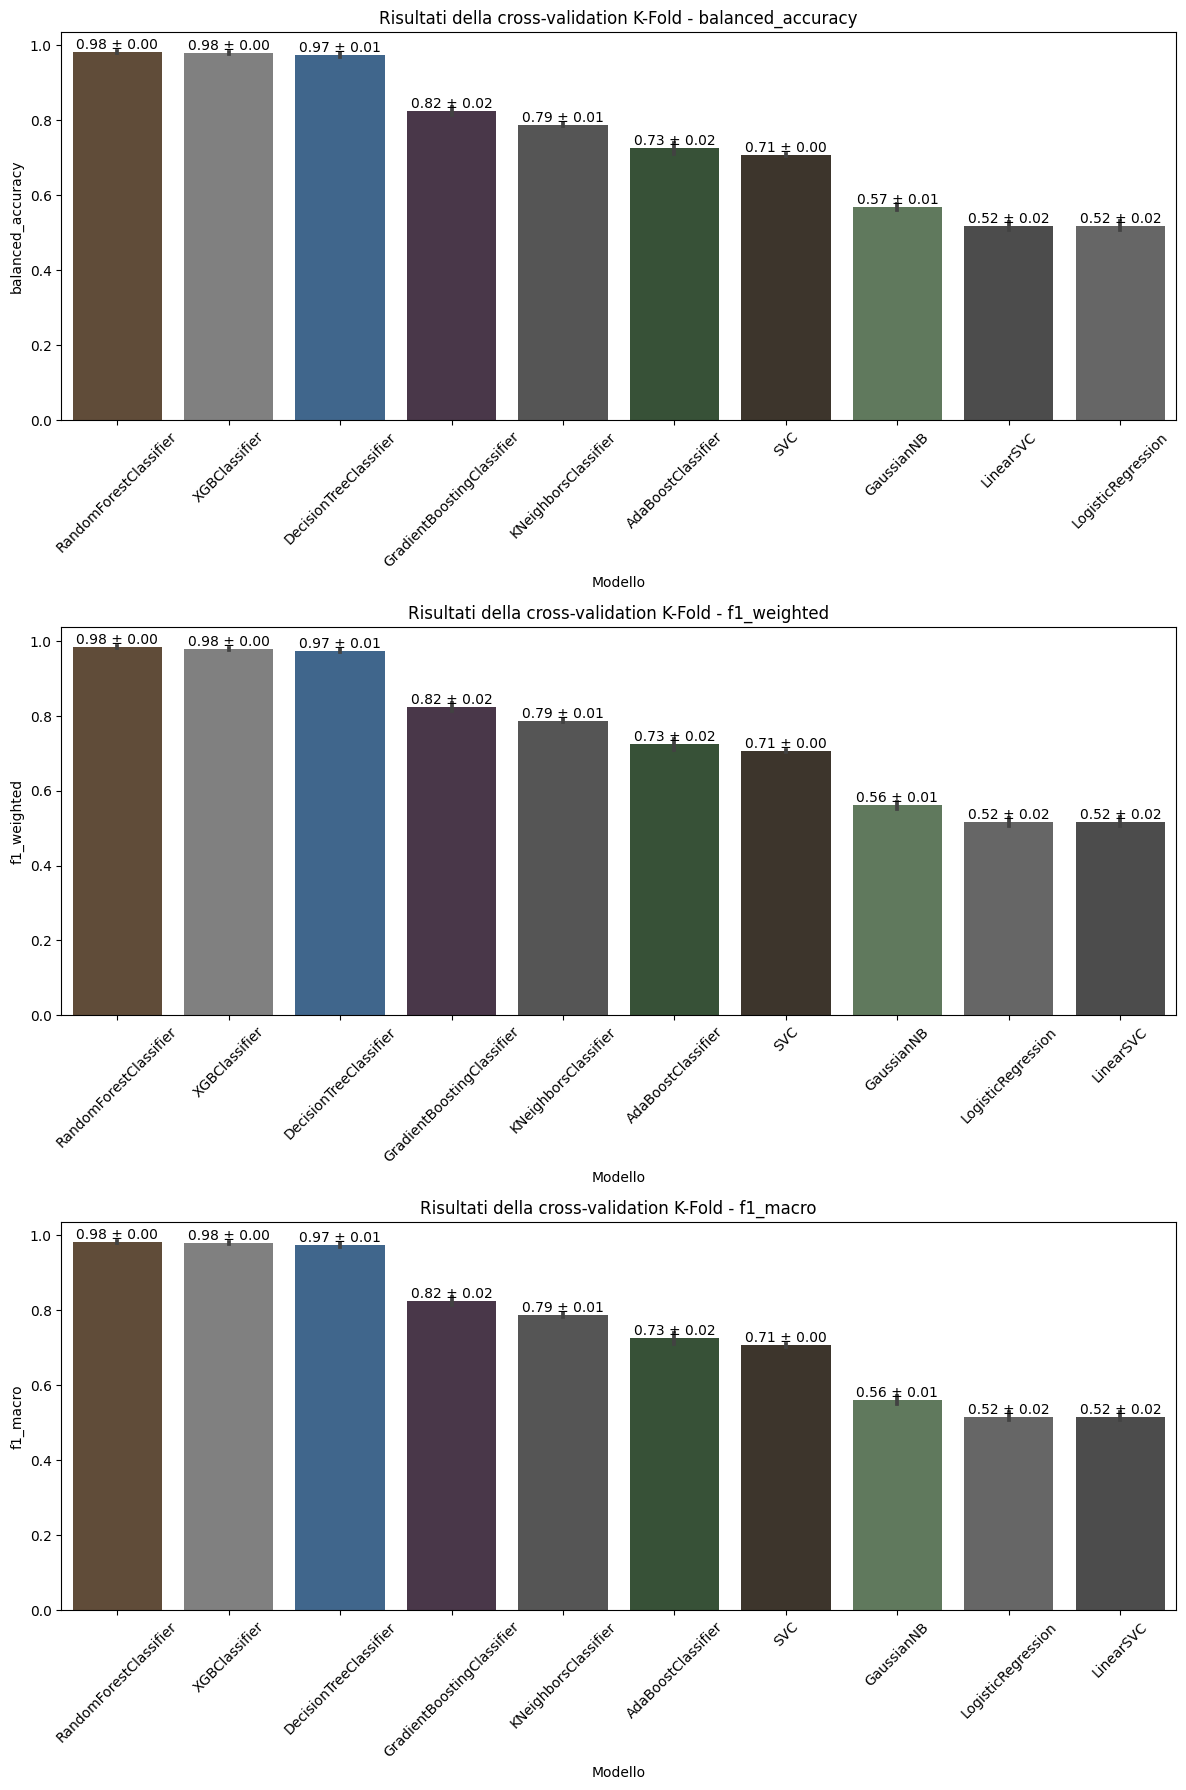

In [84]:
import matplotlib.colors as mcolors

# Definizione dei modelli
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    LinearSVC(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
]

# Creazione del KFold
kfold = KFold(n_splits=8, shuffle=True, random_state=0)


# Definizione delle metriche da considerare
metrics = ["balanced_accuracy", "f1_weighted", "f1_macro"]

# Lista per salvare i risultati delle diverse metriche
results = {metric: [] for metric in metrics}

# Esecuzione della cross-validation per le diverse metriche
for model in models:
    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring=metric)
        results[metric].append(scores)

# Creazione del plot con Seaborn per le diverse metriche
plt.rcParams['figure.figsize'] = (12, 18)
num_metrics = len(metrics)

model_colors = {
    'LogisticRegression': '#666666',
    'DecisionTreeClassifier': '#336699',
    'GaussianNB': '#5C7E58',
    'RandomForestClassifier': '#664C33',
    'LinearSVC': '#4C4C4C',
    'XGBClassifier': '#808080',
    'AdaBoostClassifier': '#335533',
    'GradientBoostingClassifier': '#4C344C',
    'KNeighborsClassifier': '#555555',
    'SVC': '#403529'
}


for i, metric in enumerate(metrics):

    # Ordinamento dei modelli in base alla media delle metriche
    sorted_models = sorted(models, key=lambda model: np.mean(results[metric][models.index(model)]), reverse=True)

    ax = plt.subplot(num_metrics, 1, i + 1)
    metric_results = [results[metric][models.index(model)] for model in sorted_models]

    # Trasformazione dei nomi dei colori in RGBA
    model_colors_rgba = [model_colors[type(model).__name__] for model in sorted_models]

    sns.barplot(data=metric_results, palette=model_colors_rgba)
    plt.xticks(range(len(models)), [type(model).__name__ for model in sorted_models], rotation=45)
    plt.xlabel('Modello')
    plt.ylabel(metric)
    plt.title(f'Risultati della cross-validation K-Fold - {metric}')

    # Aggiunta delle percentuali sulle barre
    for j in range(len(models)):
        scores = metric_results[j]
        mean_score = scores.mean()
        std_score = scores.std()
        text = f'{mean_score:.2f} ± {std_score:.2f}'
        ax.text(j, mean_score, text, ha='center', va='bottom')

plt.tight_layout()
plt.show()

The three models with highest score are:

- Random Forest
- XGB Classifier
- Decision Tree

## Hyperparameter tuning of all 3 models

Random Forest

In [15]:
# Definisci i parametri da esplorare nella grid search
parameters = {
    'n_estimators': [1250],#, 800, 1000, 1200, 1500], ->
    'max_depth': [100],# ->
    'min_samples_split': [20],# ->
    'min_samples_leaf': [1,],# 2, 4, 10],
    'max_features': ['sqrt'],
    'random_state': [0],
}

scores = []
metrics = ['balanced_accuracy', 'f1_weighted', 'f1_macro']

# Creazione del KFold
kfold = KFold(n_splits=6, shuffle=True, random_state=0)

for metric in metrics:
    # Crea un oggetto GridSearchCV per la grid search
    grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=kfold, n_jobs=-1, scoring=metric)

    # Esegui la grid search sul dataset
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri e lo score ottenuto
    print("########## ", metric.upper(), " ##########")
    print("Migliori parametri trovati:")
    print(grid_search.best_params_)
    print("Miglior score ottenuto:")
    print(grid_search.best_score_)

    # Aggiungi lo score ottenuto alla lista
    scores.append(grid_search.best_score_)

##########  BALANCED_ACCURACY  ##########
Migliori parametri trovati:
{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1250, 'random_state': 0}
Miglior score ottenuto:
0.9574414667991213
##########  F1_WEIGHTED  ##########
Migliori parametri trovati:
{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1250, 'random_state': 0}
Miglior score ottenuto:
0.957436494412875
##########  F1_MACRO  ##########
Migliori parametri trovati:
{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1250, 'random_state': 0}
Miglior score ottenuto:
0.9574339897070053


In [63]:
# Model fitting
rnd = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=0, n_jobs=-1)
#rnd = RandomForestClassifier(n_estimators=1250, max_depth=200, min_samples_split=20, 
#                                min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)
rnd.fit(X_train, y_train)
y_pred = rnd.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy score: 0.7987804878048781
F1 score: 0.7922898077164763
Recall: 0.6178861788617886
Precision: 0.8
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       205
           1       0.80      0.62      0.70       123

    accuracy                           0.80       328
   macro avg       0.80      0.76      0.77       328
weighted avg       0.80      0.80      0.79       328



In [ ]:
# Crea un DataFrame con le caratteristiche dei dati di test
df_test = pd.DataFrame(X_test, columns=features)

# Aggiungi le etichette delle classi al DataFrame
df_test['True Label'] = y_test
df_test['Predicted Label'] = y_pred
df_test['missclassified'] = df_test['True Label'] == df_test['Predicted Label']

# Filtra il DataFrame per ottenere solo i dati correttamente classificati
correctly_classified = df_test[df_test['True Label'] == df_test['Predicted Label']]

# Filtra il DataFrame per ottenere solo i dati erroneamente classificati
misclassified = df_test[df_test['True Label'] != df_test['Predicted Label']]

# Combina i dati correttamente e erroneamente classificati in un unico DataFrame
combined_data = pd.concat([correctly_classified, misclassified])

# Crea il pairplot per i dati combinati
sns.pairplot(df_test[features + ['missclassified']], hue='missclassified', corner=True)

plt.show()

XGBoost

In [21]:
# Definisci i parametri da esplorare nella grid search
#setting grid of selected parameters for iteration
parameters = {
                'gamma': [0], # ok
                'learning_rate': [0.1], # Ok
                'max_depth': [25], # ok
                'n_estimators': [200], # Ok
                'reg_alpha': [1.6],#ok
                'reg_lambda': [ 10],# ok
                'booster': ['gbtree'] # ok
}

metrics = ['balanced_accuracy', 'f1_weighted', 'f1_macro']

# Creazione del KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

for metric in metrics:
    # Crea un oggetto GridSearchCV per la grid search
    grid_search = GridSearchCV(XGBClassifier(), parameters, cv=kfold, n_jobs=-1, scoring=metric)

    # Esegui la grid search sul dataset
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri e lo score ottenuto
    print("########## ", metric.upper(), " ##########")
    print("Migliori parametri trovati:")
    print(grid_search.best_params_)
    print("Miglior score ottenuto:")
    print(grid_search.best_score_)

##########  BALANCED_ACCURACY  ##########
Migliori parametri trovati:
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'reg_alpha': 1.6, 'reg_lambda': 10}
Miglior score ottenuto:
0.9738643818744199
##########  F1_WEIGHTED  ##########
Migliori parametri trovati:
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'reg_alpha': 1.6, 'reg_lambda': 10}
Miglior score ottenuto:
0.9738353602543409
##########  F1_MACRO  ##########
Migliori parametri trovati:
{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'reg_alpha': 1.6, 'reg_lambda': 10}
Miglior score ottenuto:
0.9738241627305312


In [41]:
# Model fitting
xgb = XGBClassifier(n_estimators=3000, max_depth=25, learning_rate=0.01, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy score: 0.7972560975609756
F1 score: 0.7942977424165432
Recall: 0.6680327868852459
Precision: 0.7581395348837209


Decision Tree

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'max_depth': [200, 300, 400, 500],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_features': ["auto", "sqrt", "log2", None],
    'min_samples_split': [2, 5, 10, 20],
    'random_state': [0],
}

metrics = ['balanced_accuracy', 'f1_weighted', 'f1_macro']

# Creazione del KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for metric in metrics:
    # Crea un oggetto GridSearchCV per la grid search
    grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=kfold, n_jobs=-1, scoring=metric)

    # Esegui la grid search sul dataset
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri e lo score ottenuto
    print("########## ", metric.upper(), " ##########")
    print("Migliori parametri trovati:")
    print(grid_search.best_params_)
    print("Miglior score ottenuto:")
    print(grid_search.best_score_)

In [30]:
# Model fitting
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=250, min_samples_leaf=5, min_samples_split=2, random_state=0, max_features=None)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy score: 0.75
F1 score: 0.7497882601460756
Recall: 0.6598360655737705
Precision: 0.6652892561983471


Voting Classifier

In [15]:
from sklearn.ensemble import VotingClassifier
ens_soft_voting = VotingClassifier(
    estimators=[

        ('XGBoost',      XGBClassifier(n_estimators=3000, max_depth=25, learning_rate=0.01, gamma=0, reg_alpha=1, reg_lambda=5, booster='gbtree')),
        ('RandomForest', RandomForestClassifier(n_estimators=1250, max_depth=100, min_samples_split=20, 
                                min_samples_leaf=1, max_features='sqrt', random_state=0, n_jobs=-1)),
        ('DecisionTree', DecisionTreeClassifier(criterion="entropy", max_depth=250, min_samples_leaf=5, min_samples_split=2, random_state=0, max_features=None)),
],
    voting='hard',
    n_jobs=8
)
ens_soft_voting.fit(X_train, y_train)

y_pred = ens_soft_voting.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       412
           1       0.78      0.64      0.70       244

    accuracy                           0.80       656
   macro avg       0.79      0.77      0.78       656
weighted avg       0.80      0.80      0.79       656

